# Prediksi tingkat inflasi Indonesia menggunakan regresi

### Impor modul

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import datetime

### Import Dataset

In [2]:
# Parse the Date
def parser(x):
    return datetime.strptime(x, '%b-%y')
df_early = pd.read_csv('data/Inflasi.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df_early.head()

,IHK,CdgDevisa,BIRate,UMR,Ekspor,Impor
Date,,,,,,
2010-01-01,118.01,69562.48,6.5,908824,11595867120,9490458938
2010-02-01,118.36,NaN,6.5,908824,11166450436,9498139407
2010-03-01,118.19,NaN,6.5,908824,12774365884,10972641400
2010-04-01,118.37,NaN,6.5,908824,12035247591,11235788469
2010-05-01,118.71,NaN,6.5,908824,12619125277,9980350088


### Look into the data

In [3]:
# Look columns & it's data type
df_early.dtypes

IHK          float64
CdgDevisa    float64
BIRate       float64
UMR            int64
Ekspor         int64
Impor          int64
dtype: object

In [4]:
# Describe data
df_early.describe

<bound method NDFrame.describe of                IHK  CdgDevisa  BIRate      UMR       Ekspor        Impor
Date                                                                    
2010-01-01  118.01   69562.48    6.50   908824  11595867120   9490458938
2010-02-01  118.36        NaN    6.50   908824  11166450436   9498139407
2010-03-01  118.19        NaN    6.50   908824  12774365884  10972641400
2010-04-01  118.37        NaN    6.50   908824  12035247591  11235788469
2010-05-01  118.71        NaN    6.50   908824  12619125277   9980350088
2010-06-01  119.86        NaN    6.50   908824  12330114499  11760001067
2010-07-01  121.74        NaN    6.50   908824  12486972905  12625936085
2010-08-01  122.67        NaN    6.50   908824  13726521968  12171550612
2010-09-01  123.21        NaN    6.50   908824  12181628292   9654127469
2010-10-01  123.29        NaN    6.50   908824  14399644857  12120016599
2010-11-01  124.03        NaN    6.50   908824  15633275868  13007603335
2010-12-01  125.1

## Preprocessing

### Missing Value

In [5]:
# Check for missing value
df_early.isnull().sum()

IHK           0
CdgDevisa    98
BIRate        0
UMR           0
Ekspor        0
Impor         0
dtype: int64

In [6]:
# Handle it with interpolation 'slinear'
df = df_early.interpolate(method='slinear')
df.head(12)

,IHK,CdgDevisa,BIRate,UMR,Ekspor,Impor
Date,,,,,,
2010-01-01,118.01,69562.480000,6.5,908824,11595867120,9490458938
2010-02-01,118.36,72035.474371,6.5,908824,11166450436,9498139407
2010-03-01,118.19,74269.146707,6.5,908824,12774365884,10972641400
2010-04-01,118.37,76742.141078,6.5,908824,12035247591,11235788469
2010-05-01,118.71,79135.361437,6.5,908824,12619125277,9980350088
2010-06-01,119.86,81608.355808,6.5,908824,12330114499,11760001067
2010-07-01,121.74,84001.576168,6.5,908824,12486972905,12625936085
2010-08-01,122.67,86474.570539,6.5,908824,13726521968,12171550612
2010-09-01,123.21,88947.564910,6.5,908824,12181628292,9654127469


## Correlation Map

Text(0.5, 1.0, 'Correlation between different features')

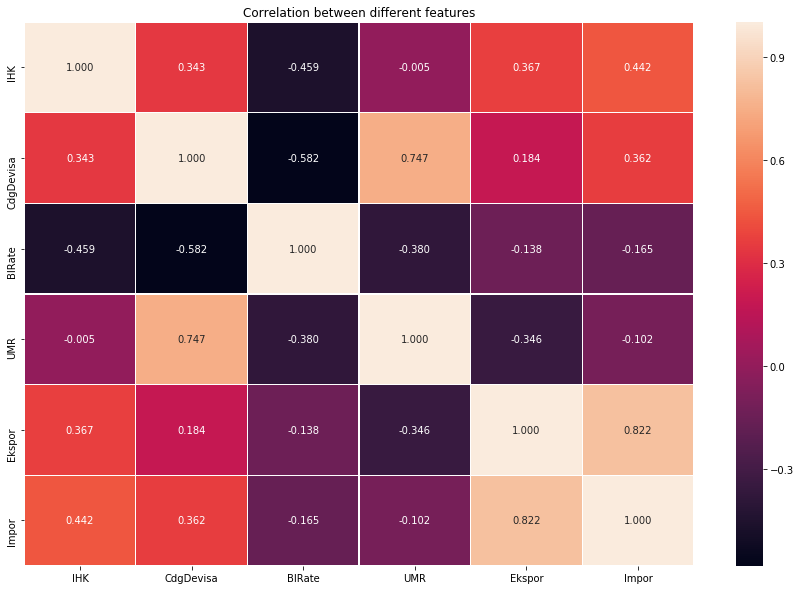

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.20, fmt='.3f')
plt.title('Correlation between different features')

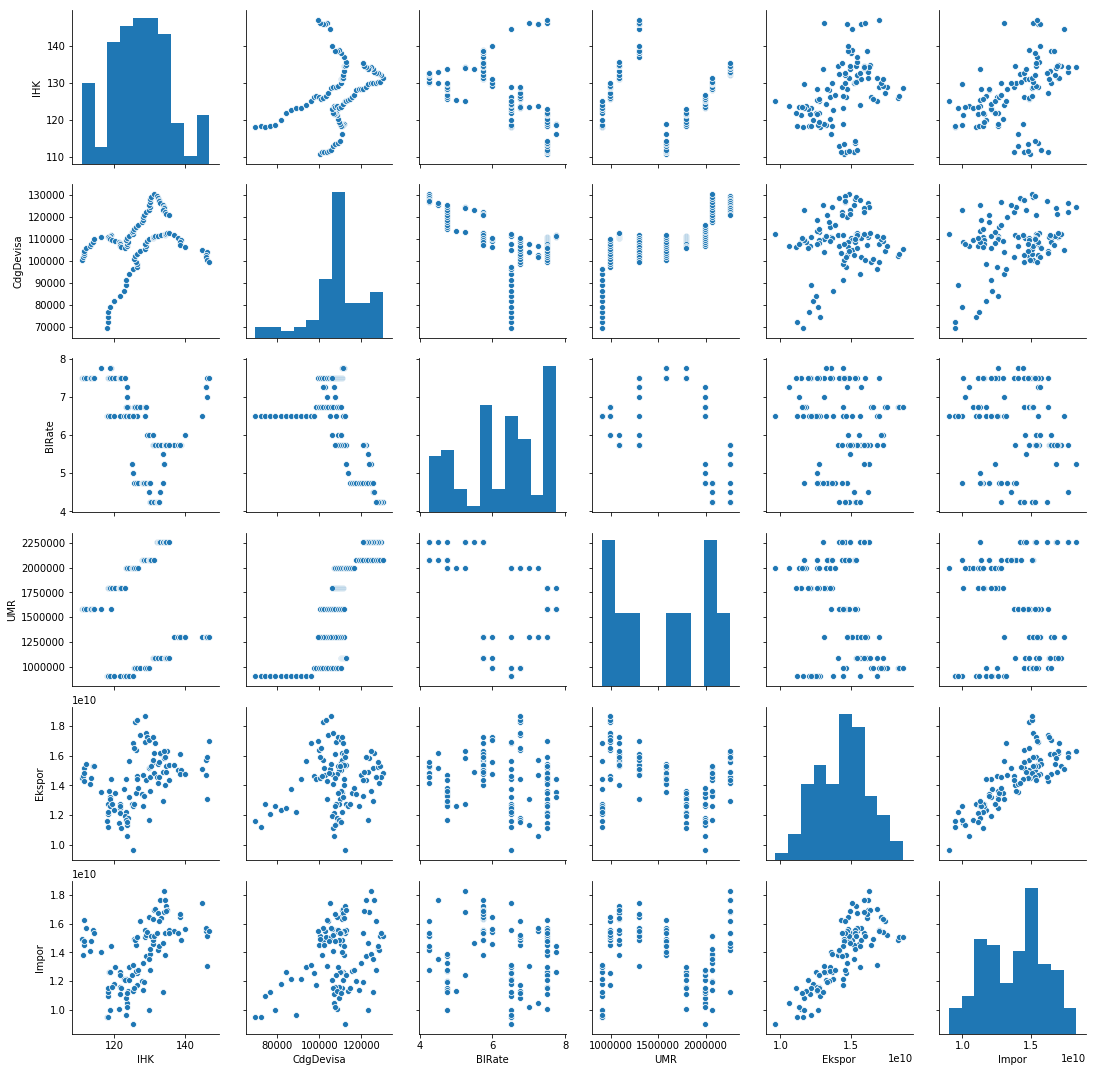

In [8]:
sns.pairplot(df)

## Multivariate Linear Regression

### Import Module

In [9]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import operator

### Modelling & Visualization Data

In [30]:
def plot_yyhat(ytest,ypred):
    r2 = r2_score(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    #This is a trick to get the scaling right, we want the minimum and maximum possible values for both
    #the testing data and the predicted values
    
    absmin = min([ytest.min(),ypred.min()])
    absmax = max([ytest.max(),ypred.max()])
    
    ax = plt.axes()
    ax.scatter(ytest,ypred)
    #ax.set_title('Y vs. YHat')
    ax.axis([absmin, absmax, absmin, absmax])
    ax.plot([absmin, absmax], [absmin, absmax],c="k")
    ax.set_ylabel('Predicted Area') 
    ax.set_xlabel('Actual Area')
    
    #Plot the text box
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textStr = '$MAE=%.3f$\n$R2=%.3f$' % (mae, r2)
    ax.text(0.05, 0.95, textStr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props);

def scoring(train, test):
    #training & testing
    xtrain = train.drop(['IHK'],axis=1)
    ytrain = train['IHK']
    xtest = test.drop(['IHK'],axis=1)
    ytest = test['IHK']

    #Scoring
    regr = linear_model.LinearRegression()#(normalize=True)
    regr.fit(xtrain, ytrain)

    scoremodel = regr.score(xtest, ytest)
    #scoreadj = 1 - (1-regr.score(xtest, ytest))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1)
    
    ypred = regr.predict(xtest)
    r2model = r2_score(ytest, ypred)
    
    #test
    contoh = test.copy()
    contoh['Predict'] = ypred
    print(contoh[['Predict','IHK']].head(5))
    
    #R2 Score
    print("Score R2:  ",r2model)
    
    ypred = regr.predict(xtest)
    plot_yyhat(ytest,ypred)
    
    

C:\Users\Sadrakh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


               Predict     IHK
Date                          
2012-05-01  135.209351  131.41
2018-10-01  129.478811  134.20
2018-11-01  129.136848  134.56
2018-08-01  130.326656  134.07
2018-03-01  131.608033  132.58
Score R2:   0.5774451263347764


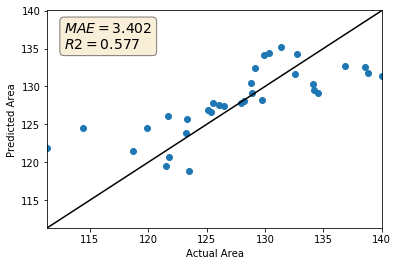

In [38]:
# Create the Model
train, test = train_test_split(df,train_size=0.7, random_state = 55)

scoring(train, test)

C:\Users\Sadrakh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


               Predict     IHK
Date                          
2012-05-01  134.679498  131.41
2018-10-01  131.881171  134.20
2018-11-01  131.121884  134.56
2018-08-01  132.372400  134.07
2018-03-01  132.439459  132.58
Score R2:   0.5423570381718765


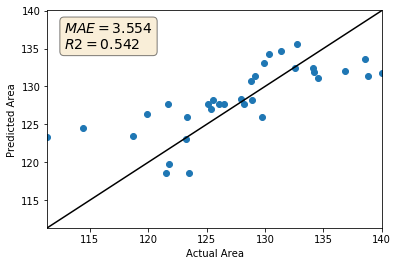

In [39]:
# Create the Model
train, test = train_test_split(df.drop(['CdgDevisa'], axis = 1),train_size=0.7, random_state = 55)

scoring(train, test)

C:\Users\Sadrakh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


               Predict     IHK
Date                          
2012-05-01  134.235432  131.41
2018-10-01  128.464253  134.20
2018-11-01  127.915666  134.56
2018-08-01  128.443769  134.07
2018-03-01  128.311211  132.58
Score R2:   0.405201972972162


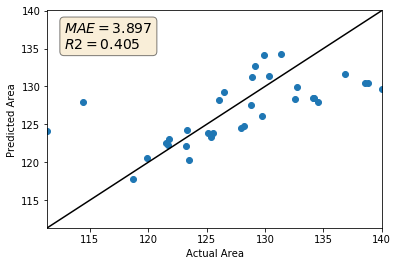

In [105]:
# Create the Model
train, test = train_test_split(df.drop(['BIRate'], axis = 1),train_size=0.7, random_state = 55)

scoring(train, test)

C:\Users\Sadrakh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


               Predict     IHK
Date                          
2012-05-01  133.646181  131.41
2018-10-01  133.975526  134.20
2018-11-01  132.775929  134.56
2018-08-01  134.373742  134.07
2018-03-01  134.198241  132.58
Score R2:   0.5269745866243626


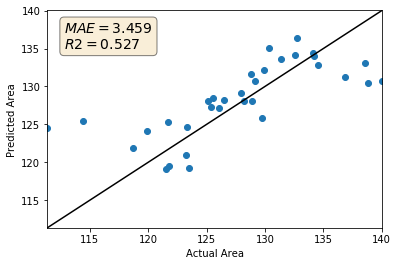

In [41]:
# Create the Model
train, test = train_test_split(df.drop(['UMR'], axis = 1),train_size=0.7, random_state = 55)

scoring(train, test)

C:\Users\Sadrakh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


               Predict     IHK
Date                          
2012-05-01  134.997980  131.41
2018-10-01  129.702732  134.20
2018-11-01  128.915564  134.56
2018-08-01  130.794605  134.07
2018-03-01  132.615941  132.58
Score R2:   0.5407498103645596


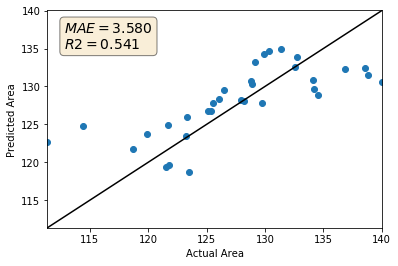

In [42]:
# Create the Model
train, test = train_test_split(df.drop(['Ekspor'], axis = 1),train_size=0.7, random_state = 55)

scoring(train, test)

C:\Users\Sadrakh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


               Predict     IHK
Date                          
2012-05-01  134.243805  131.41
2018-10-01  126.877835  134.20
2018-11-01  126.354236  134.56
2018-08-01  128.736765  134.07
2018-03-01  132.641984  132.58
Score R2:   0.4627686021586801


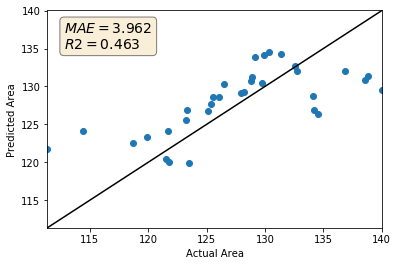

In [43]:
# Create the Model
train, test = train_test_split(df.drop(['Impor'], axis = 1),train_size=0.7, random_state = 55)

scoring(train, test)

# Extra

## Decision Tree

In [21]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(xtrain., ytrain)
clf.predict(xtest)

array([131.32, 134.14, 135.39, 134.45, 132.1 , 134.67, 138.64, 125.15,
       128.54, 130.96, 122.67, 133.77, 124.03, 122.67, 128.74, 126.18,
       118.19, 135.39, 127.35, 126.18, 113.89, 126.18, 125.66, 123.62,
       122.67, 122.99, 138.64, 131.28, 134.43, 111.28, 121.67, 128.54,
       133.77])

In [25]:
# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(xtrain, ytrain)
regr_2.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

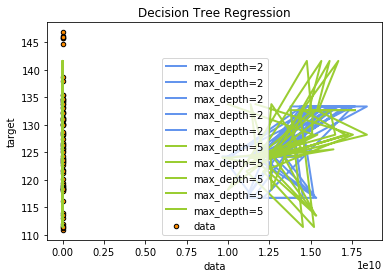

In [28]:
# Predict
y_1 = regr_1.predict(xtest)
y_2 = regr_2.predict(xtest)

# Plot the results
plt.figure()
plt.scatter(xtrain.BIRate, ytrain, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(xtest, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(xtest, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Gradient Boosting

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 20, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [ ]:
clf.fit(xtrain, ytrain)

In [ ]:
#Score
clf.score(xtest,ytest)

In [ ]:
#Score 
y_pred = clf.predict(xtest)
r2model = r2_score(ytest, ypred)
print("Score R2 Model (Testing): ",r2model)

In [ ]:
plot_yyhat(ytest,ypred)

In [ ]:
for pred in clf.staged_predict(xtest):
    plt.plot(xtest[:],pred, color = 'r', alpha = 0.1)

In [ ]:
df.columns

In [ ]:
# Pair-wise Scatter Plots
cols = ['IHK', 'CdgDevisa', 'BIRate', 'UMR','Ekspor','Impor']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

### Polynomial Regression

In [66]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
df.columns

Index(['IHK', 'CdgDevisa', 'BIRate', 'UMR', 'Ekspor', 'Impor'], dtype='object')

1125173142.0286748
0.7395776505376859


ValueError: x and y must be the same size

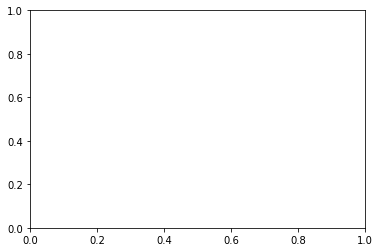

In [36]:
df1 = df.drop(['CdgDevisa'], axis = 1)
X = df1.iloc[:, 0:4].values 
y = df1.iloc[:, 4].values

poly = PolynomialFeatures(degree = 1) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

y_poly_pred = lin2.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Cadangan Devisa terhadap Inflasi') 
plt.xlabel('IHK') 
plt.ylabel('CdgDevisa') 
  
plt.show()

0.6608893738393807
0.6179715156845094


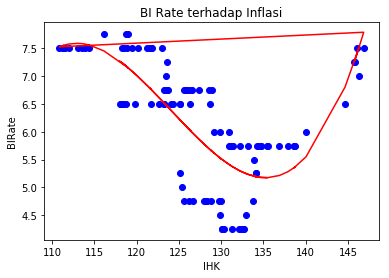

In [104]:
df2 = df.drop(['CdgDevisa','Ekspor','Impor'], axis = 1)
X = df2.iloc[:, 0:1].values
y = df2.iloc[:, 1].values

poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

y_poly_pred = lin2.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('BI Rate terhadap Inflasi') 
plt.xlabel('IHK') 
plt.ylabel('BIRate') 

plt.show()

462319.8599840484
0.052048531745042204


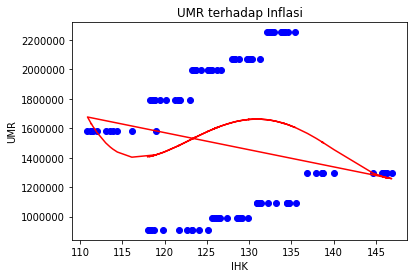

In [84]:
df3 = df.drop(['CdgDevisa', 'BIRate','Ekspor','Impor'], axis = 1)
X = df3.iloc[:, 0:1].values 
y = df3.iloc[:, 1].values

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

y_poly_pred = lin2.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('UMR terhadap Inflasi') 
plt.xlabel('IHK') 
plt.ylabel('UMR') 
  
plt.show()

1491572003.982067
0.33942875977045883


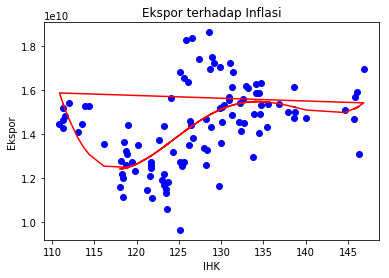

In [91]:
df4 = df.drop(['CdgDevisa', 'BIRate','UMR','Impor'], axis = 1)
X = df4.iloc[:, 0:1].values 
y = df4.iloc[:, 1].values

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

y_poly_pred = lin2.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Ekspor terhadap Inflasi') 
plt.xlabel('IHK') 
plt.ylabel('Ekspor') 
  
plt.show()

1469560899.9960058
0.5557630124556139


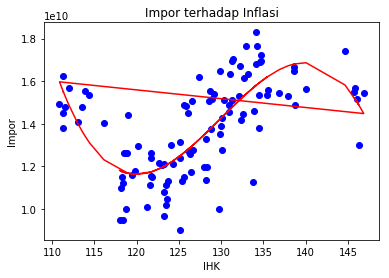

In [93]:
df5 = df.drop(['CdgDevisa', 'BIRate','UMR','Ekspor'], axis = 1)
X = df5.iloc[:, 0:1].values
y = df5.iloc[:, 1].values

poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

y_poly_pred = lin2.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Impor terhadap Inflasi') 
plt.xlabel('IHK') 
plt.ylabel('Impor') 
  
plt.show()

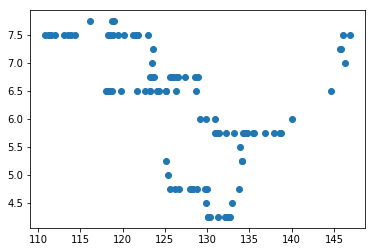

In [28]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear')
plt.scatter(df['IHK'],df['BIRate'])

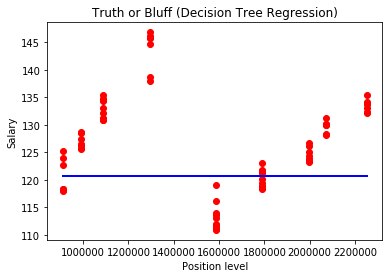

In [87]:
# Importing the dataset
# dataset= pd.read_csv('Data.csv')
X = df.iloc[: , 1:2].values
Y = df.iloc[: , 0:1].values

# Fitting Simple Linear Regression model to the data set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(xtrain.iloc[:, 2:3].values, ytrain)

# Predicting a new result
y_pred = regressor.predict(xtest.iloc[:, 2:3].values)
y_pred = y_pred.reshape(-1, 1)
# Visualising the Decision Tree Regression results

X_grid = np.arange(min(xtrain.iloc[:, 2:3].values), max(xtrain.iloc[:, 2:3].values), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(xtrain.iloc[:, 2:3].values, ytrain, color = 'red')
plt.plot(xtest.iloc[:, 2:3].values, regressor.predict(y_pred), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [63]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 55)
# Train the model on training data

train, test = train_test_split(df,train_size=0.7, random_state = 55)
xtrain = train.drop(['IHK'],axis=1)
ytrain = train['IHK']
xtest = test.drop(['IHK'],axis=1)
ytest = test['IHK']
    
rf.fit(xtrain, ytrain)

# Use the forest's predict method on the test data
predictions = rf.predict(xtest)

# Calculate the absolute errors
errors = abs(predictions - ytest)

# Print out the mean absolute error (mae)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.0800606060606037
Accuracy: 99.16 %.


C:\Users\Sadrakh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [59]:
train, test = train_test_split(df,train_size=0.7, random_state = 55)
xtrain = train.drop(['IHK'],axis=1)
ytrain = train['IHK']
xtest = test.drop(['IHK'],axis=1)
ytest = test['IHK']

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=55)  
regressor.fit(xtrain, ytrain)  
y_pred = regressor.predict(xtest)  

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

# Extract single tree
estimator = regressor.estimators_[5]

from sklearn.tree import export_graphviz
import pydot
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(xtrain),
                class_names = list(test),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

C:\Users\Sadrakh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Mean Absolute Error: 1.0800606060606037
Mean Squared Error: 1.8730162424242378
Root Mean Squared Error: 1.3685818362174174


In [ ]:
# Bandingkan berbagai model (MLP, SVR, Decision tree, dll)
# Cari Paling besar -> Ksimpulan 1
# Cek masing2 fitur dengan mengecualikan fitur tersebut
# Cari paling berpengaruh -> kesimpulan 2